In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
nchan = 200000
header_size = 256

In [3]:
path = '/home/daniel/gnss_iot/ea4gpz/2019-06-25T20:59:36_000008.bin'
with open(path, 'rb') as f:
    f.seek((header_size+4*nchan)*21)
    s0 = f.read(header_size)
    x0 = np.fromfile(f, dtype = 'float32', count = nchan)
path = '/home/daniel/gnss_iot/ea4gpz/2019-06-25T20:59:36_000006.bin'
with open(path, 'rb') as f:
    s1 = f.read(header_size)
    x1 = np.fromfile(f, dtype = 'float32', count = nchan)

In [4]:
sys.stdout.write(s0.strip(b'\x00'))

HEADER
UTC_START    2019-06-26T10:54:41.533
FREQ         1575420000.000000 Hz
BW           2000000.000000 Hz
LENGTH       99.995872 s
NCHAN        200000
NSUB         60
END


In [5]:
sys.stdout.write(s1.strip(b'\x00'))

HEADER
UTC_START    2019-06-26T06:59:41.535
FREQ         1575420000.000000 Hz
BW           2000000.000000 Hz
LENGTH       99.999748 s
NCHAN        200000
NSUB         60
END


In [6]:
def do_plot(x, tstamp):
    plt.figure(figsize = (12,8), facecolor = 'w')
    div = 200
    f = np.linspace(-1,1,nchan//div)
    plt.plot(f, 10*np.log10(np.average(x.reshape((-1,div)), axis = 1)))
    plt.ylabel('Power spectral density (dB)')
    plt.xlabel('Frequency offset from 1575.42MHz (MHz)')
    plt.title(f'Spectrum at {tstamp}')

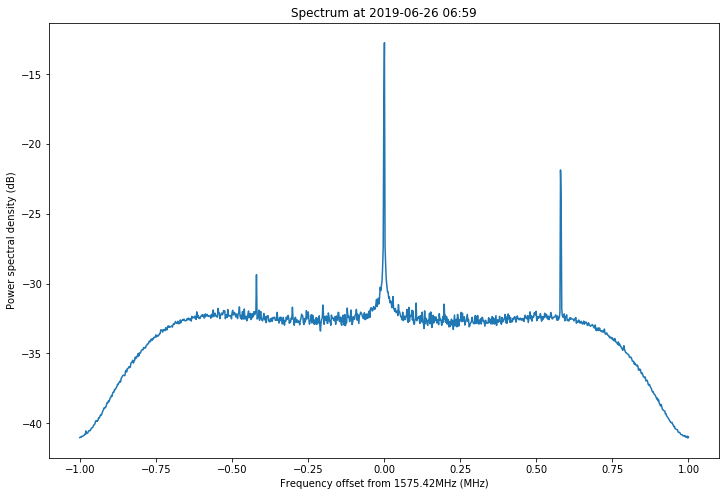

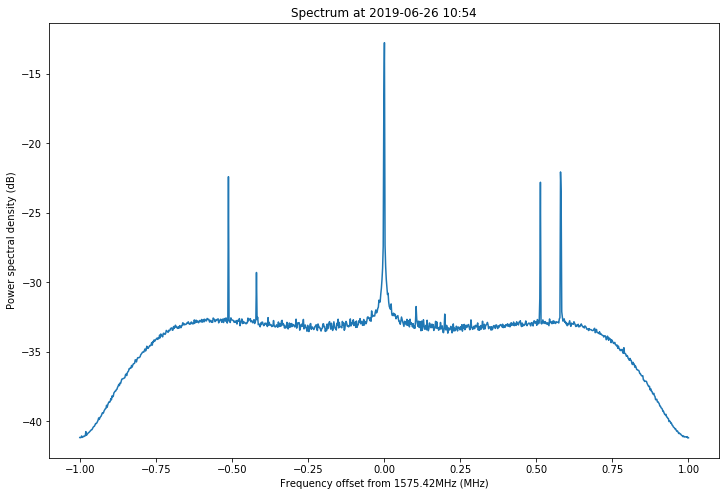

In [7]:
do_plot(x1, '2019-06-26 06:59')
do_plot(x0, '2019-06-26 10:54')